In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv('/home/djden/Development/Science/FateOfFat/MDSS/Initial Data/db_nl_preprocessed.csv')
df

,возраст,пол,масса_тела,рост,от,об,оп,жм,мм,ож,...,селен_se,фтор_f,хром_cr,цинк_zn,профессия_работники_преимущественно_умственного_труда,профессия_работники_занятые_легким_физическим_трудом,спорт_легкий_спорт,спорт_не_занимаюсь,bmi,target
0,20.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.21,NaN,NaN,0.17,0,0,0,0,NaN,0
1,20.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.24,NaN,NaN,0.15,0,0,0,0,NaN,0
2,22.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.32,NaN,NaN,0.26,1,0,0,0,NaN,0
3,23.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.17,NaN,NaN,0.03,0,0,0,0,NaN,0
4,22.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.26,NaN,NaN,0.08,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,44.0,0,104.0,170.0,106.0,115.0,NaN,36.7,NaN,49.2,...,60.15,68.55,6.56,4.58,1,0,0,1,35.986159,0
2881,60.0,0,180.2,174.0,NaN,NaN,NaN,99.5,45.0,60.5,...,254.15,179.18,6.91,24.05,1,0,0,1,59.519091,1
2882,47.0,1,82.0,162.0,NaN,NaN,NaN,34.5,20.7,34.7,...,146.40,183.49,34.77,12.77,1,0,0,1,31.245237,1
2883,45.0,0,174.8,185.0,149.7,126.0,170.0,75.4,55.6,74.3,...,199.63,86.15,7.51,17.86,1,0,0,1,51.073776,1


<Axes: xlabel='пищ._волокна', ylabel='Count'>

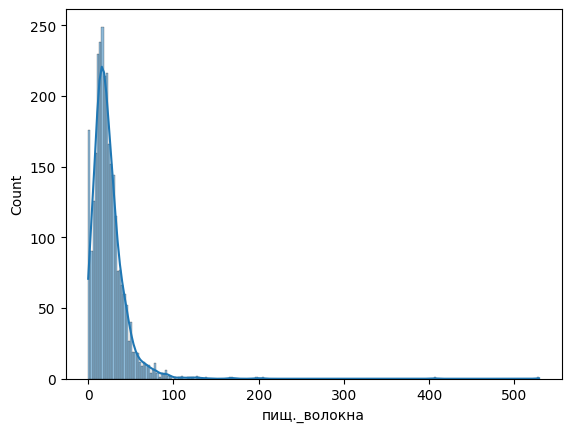

In [6]:
sns.histplot(df['пищ._волокна'], kde=True)

In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print(f'Точность модели: {accuracy}')

Точность модели: 0.7902946273830156
